In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_train = pd.read_csv('./train.csv')

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

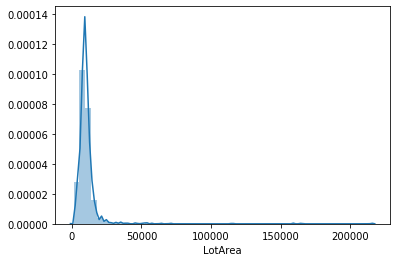

In [7]:
sns.distplot(df_train['LotArea']);

In [8]:
print("Skewness: %f" % df_train['LotArea'].skew())
print("Kurtosis: %f" % df_train['LotArea'].kurt())

Skewness: 12.207688
Kurtosis: 203.243271


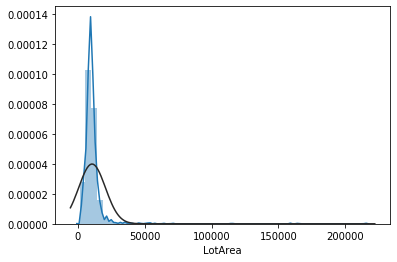

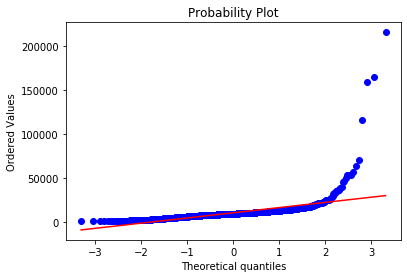

In [9]:
sns.distplot(df_train['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['LotArea'], plot=plt)

In [10]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

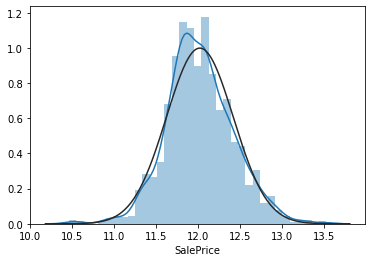

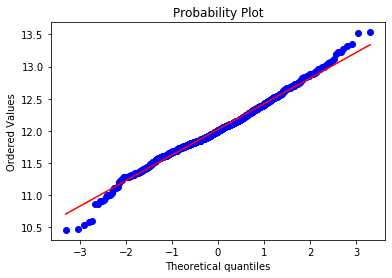

In [11]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

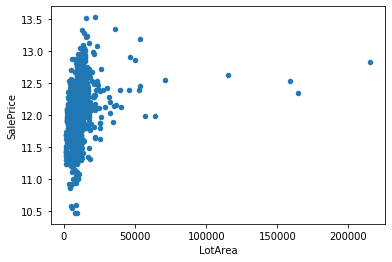

In [12]:
var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

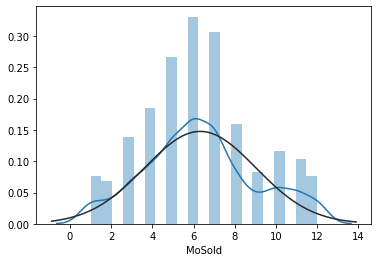

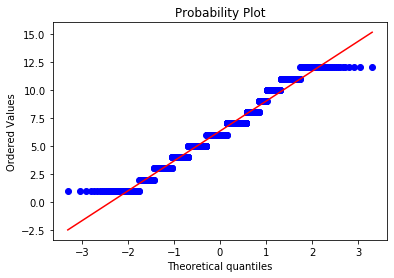

In [13]:
sns.distplot(df_train['MoSold'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['MoSold'], plot=plt)

In [14]:
(df_train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.667790
GrLivArea        0.491298
GarageCars       0.463250
GarageArea       0.423655
TotalBsmtSF      0.374708
1stFlrSF         0.356386
FullBath         0.353752
YearBuilt        0.344065
YearRemodAdd     0.319912
GarageYrBlt      0.292760
TotRmsAbvGrd     0.285607
Fireplaces       0.239561
MasVnrArea       0.185596
BsmtFinSF1       0.138401
LotFrontage      0.126649
WoodDeckSF       0.111646
OpenPorchSF      0.103075
2ndFlrSF         0.101952
HalfBath         0.098585
LotArea          0.066214
BsmtFullBath     0.055802
BsmtUnfSF        0.049277
BedroomAbvGr     0.043699
EnclosedPorch    0.022216
KitchenAbvGr     0.021770
ScreenPorch      0.014691
MSSubClass       0.005470
PoolArea         0.004872
MoSold           0.003287
3SsnPorch        0.003014
LowQualFinSF     0.001441
YrSold           0.001389
OverallCond      0.001359
MiscVal          0.000401
Id               0.000322
BsmtHalfBath     0.000027
BsmtFinSF2       0.000023
Name: SalePrice, dtype: float64

In [15]:
from sklearn.datasets import make_regression

n_features = 3
X, y = make_regression(n_samples=30, n_features=n_features, 
                       n_informative=n_features, random_state=42, 
                       noise=0.5, bias=100.0)
print(X.shape)

(30, 3)


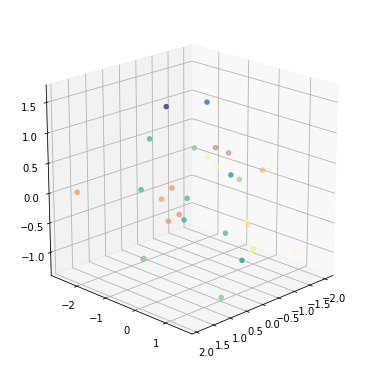

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.9999838079561165


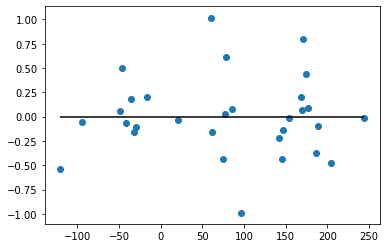

In [18]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()